In [1]:
#import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ROOT;
#import lumiere as lm
import seaborn as sns
#lm.loadstyle(True)

Welcome to JupyROOT 6.28/10


## read data

In [2]:
RDF = ROOT.ROOT.RDataFrame

signal_tree_name = 'signal'
background_tree_name = 'background'
test_tree_name = 'validation'
file_name = 'atlas-higgs-challenge-2014-v2_part.root'

rdf_signal = RDF(signal_tree_name, file_name)
rdf_bkg = RDF(background_tree_name, file_name)
rdf_test = RDF(test_tree_name, file_name)

#pd.DataFrame(rdf_signal.AsNumpy())

## `transverse_lepton jet_mass` reconstruction

In [3]:
reconstruct_transverse_lepton_jet_mass = '''

float lep_px = PRI_lep_pt * TMath::Cos(PRI_lep_phi);
float lep_py = PRI_lep_pt * TMath::Sin(PRI_lep_phi);
float jet_px = PRI_jet_leading_pt * TMath::Cos(PRI_jet_leading_phi);
float jet_py = PRI_jet_leading_pt * TMath::Sin(PRI_jet_leading_phi);

//calculate angle between jet and lepton
float cos_theta = (lep_px*jet_px + lep_py*jet_py) / PRI_lep_pt / PRI_jet_leading_pt;

return PRI_lep_pt * PRI_jet_leading_pt * (1 - cos_theta);
'''

#insertion
rdf_signal = rdf_signal.Define('transverse_lepton_jet_mass', reconstruct_transverse_lepton_jet_mass)
rdf_bkg = rdf_bkg.Define('transverse_lepton_jet_mass', reconstruct_transverse_lepton_jet_mass)
rdf_test = rdf_test.Define('transverse_lepton_jet_mass', reconstruct_transverse_lepton_jet_mass)

## to df

In [4]:
df_signal = pd.DataFrame(rdf_signal.AsNumpy())
df_bg = pd.DataFrame(rdf_bkg.AsNumpy())
df_test = pd.DataFrame(rdf_test.AsNumpy())

In [5]:
df_signal.columns.tolist()

['DER_deltaeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_lep_eta_centrality',
 'DER_mass_MMC',
 'DER_mass_jet_jet',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_met_phi_centrality',
 'DER_prodeta_jet_jet',
 'DER_pt_h',
 'DER_pt_ratio_lep_tau',
 'DER_pt_tot',
 'DER_sum_pt',
 'EventId',
 'KaggleSet',
 'KaggleWeight',
 'Label',
 'PRI_jet_all_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_leading_pt',
 'PRI_jet_num',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_subleading_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_lep_pt',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_tau_pt',
 'Weight',
 'transverse_lepton_jet_mass']

## Available columns

In [6]:
columns = [col for col in rdf_signal.GetColumnNames()]
#for col in columns:
#    print(col)

### input columns

In [11]:
#input_columns = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "transverse_lepton_jet_mass"]
#for col in input_columns:
#    print(col)

## correlation plots

31


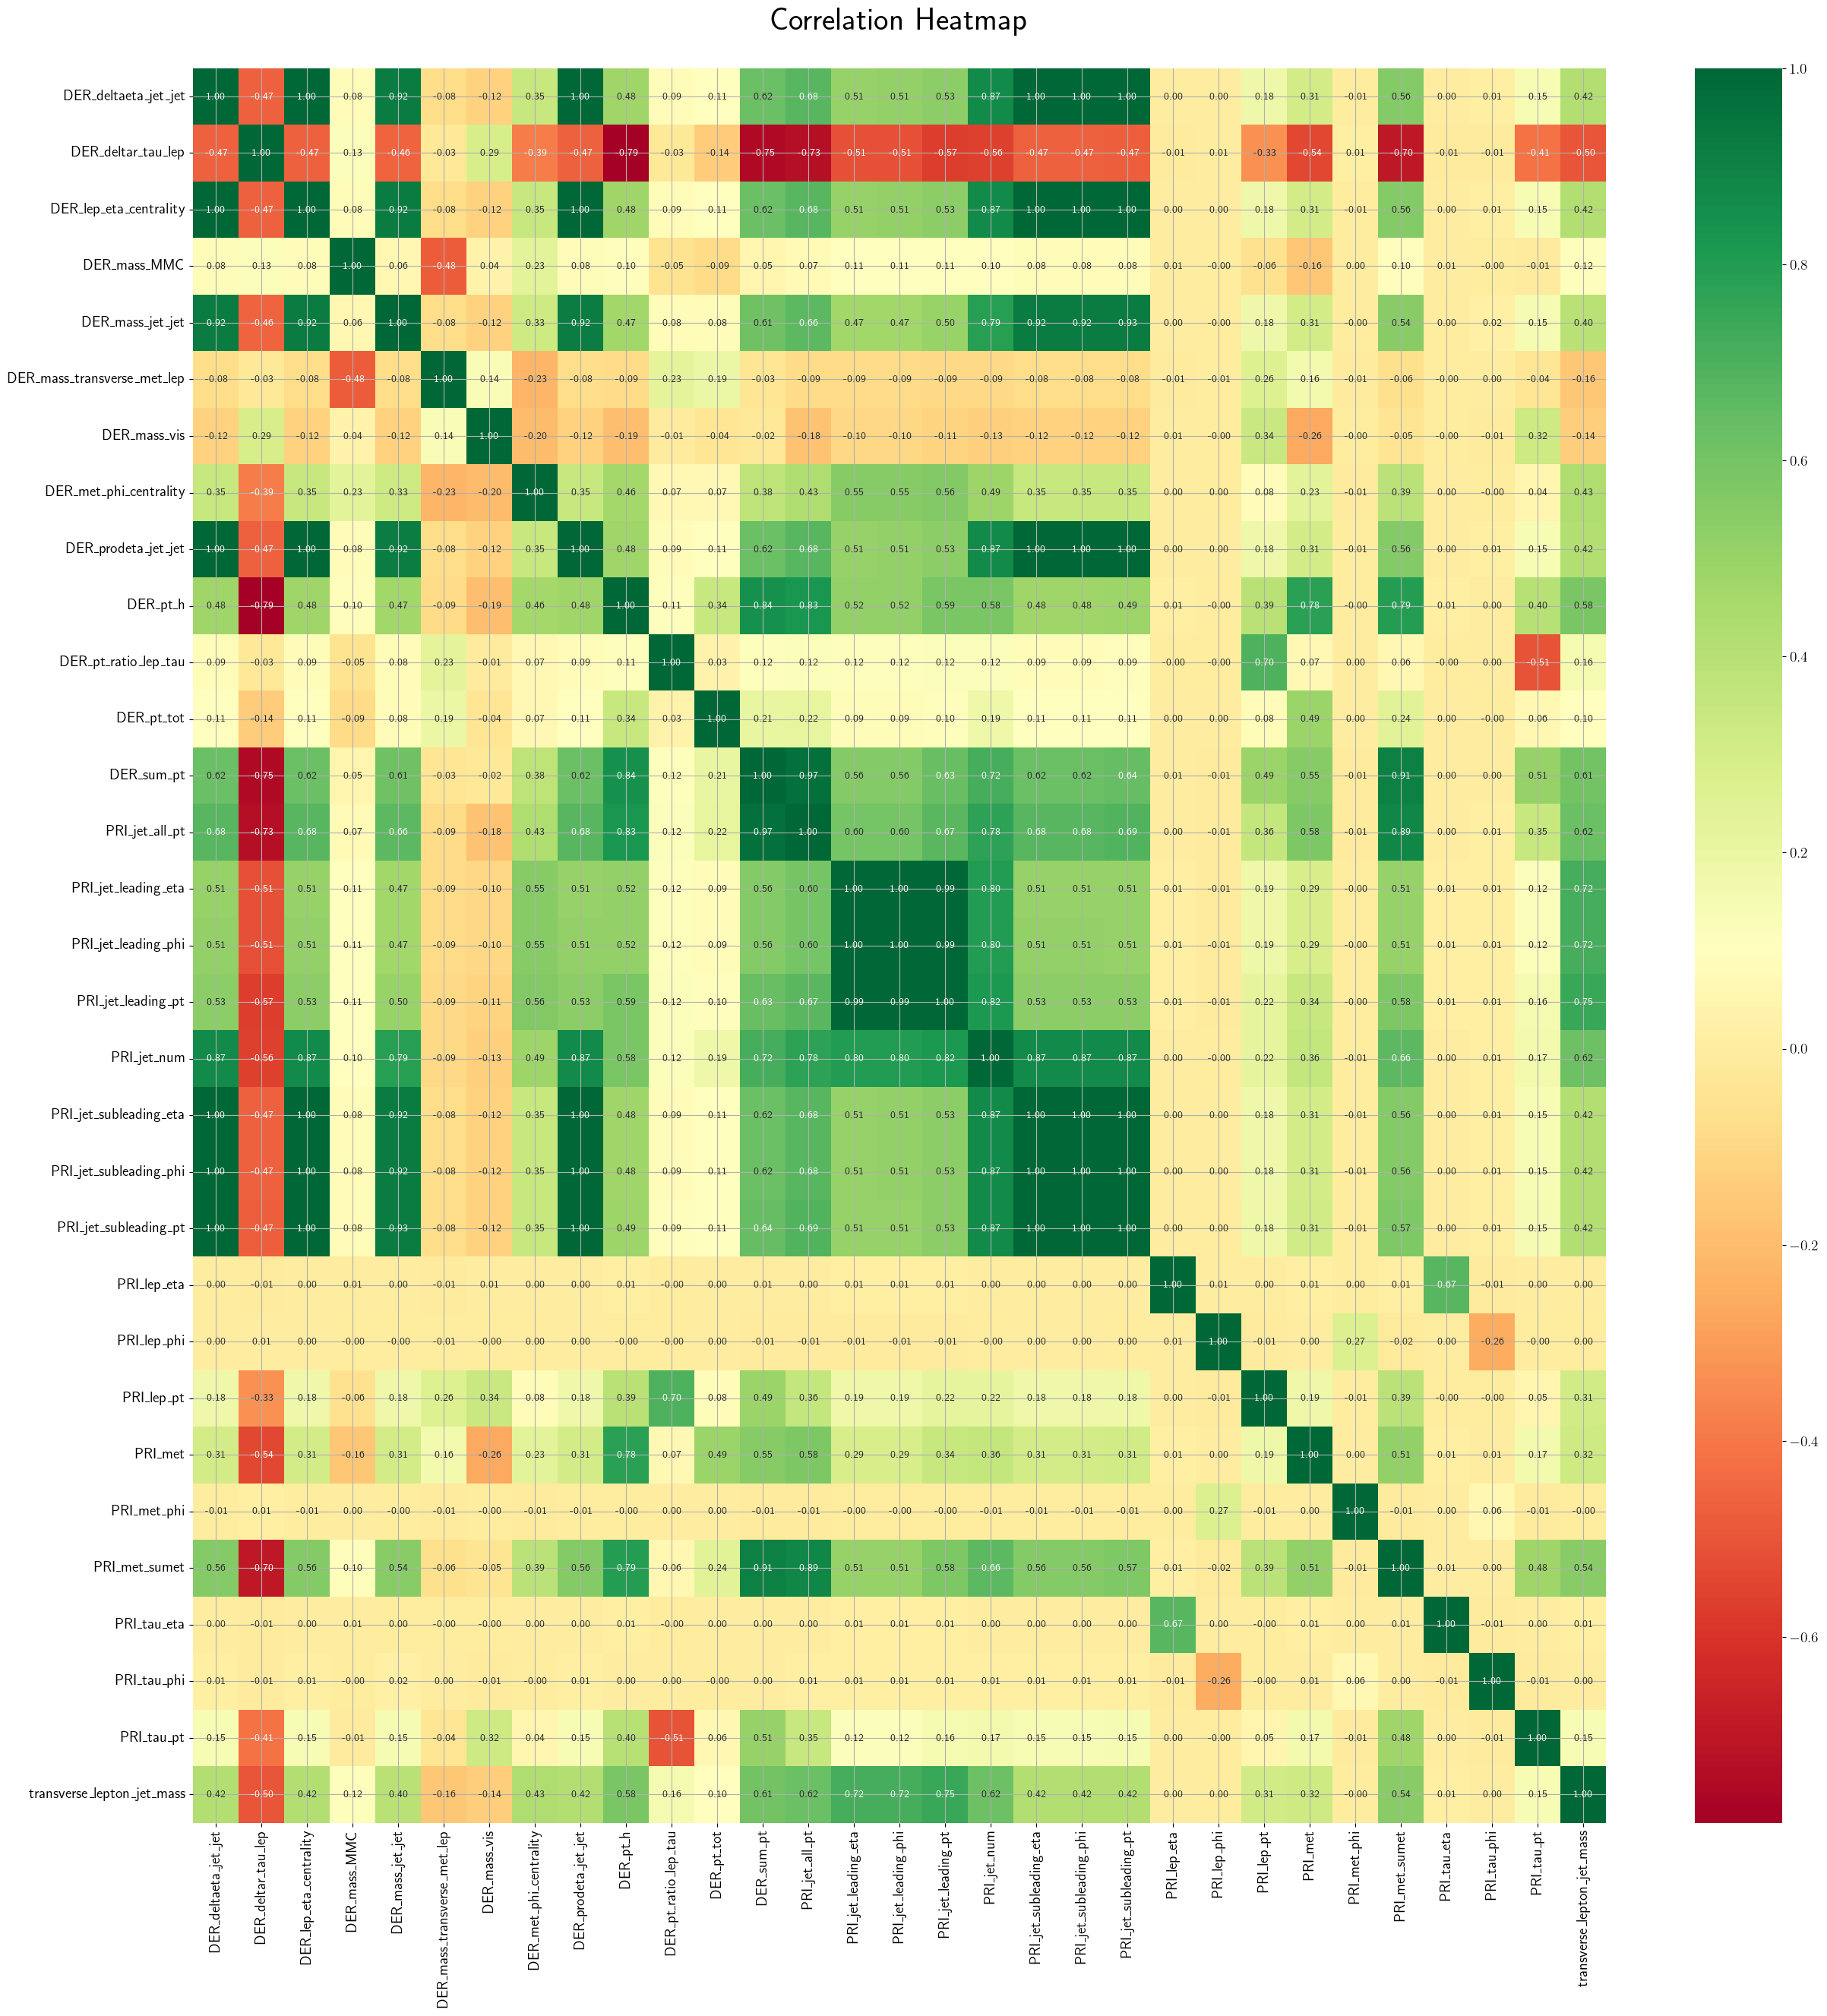

In [23]:
input_columns = ['DER_deltaeta_jet_jet', 'DER_deltar_tau_lep', 'DER_lep_eta_centrality', 'DER_mass_MMC', 'DER_mass_jet_jet', 
                 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_met_phi_centrality', 'DER_prodeta_jet_jet', 'DER_pt_h', 
                 'DER_pt_ratio_lep_tau', 'DER_pt_tot', 'DER_sum_pt', 'PRI_jet_all_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 
                 'PRI_jet_leading_pt', 'PRI_jet_num', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_subleading_pt', 
                 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_lep_pt', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_tau_eta', 'PRI_tau_phi', 
                 'PRI_tau_pt', 'transverse_lepton_jet_mass']
print(len(input_columns))


corr = df_signal[input_columns].corr()
corr.index = df_signal[input_columns].columns

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title("Correlation Heatmap\n", fontsize=30)
plt.show()

## plots

In [8]:
input_columns = ["DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "transverse_lepton_jet_mass"]

regions = [(50, 200), 
          (0, 100), 
          (0, 150),
          (0, 300),
          (-10000, 20000)]

region_dict = dict(zip(input_columns, regions))

## correlation

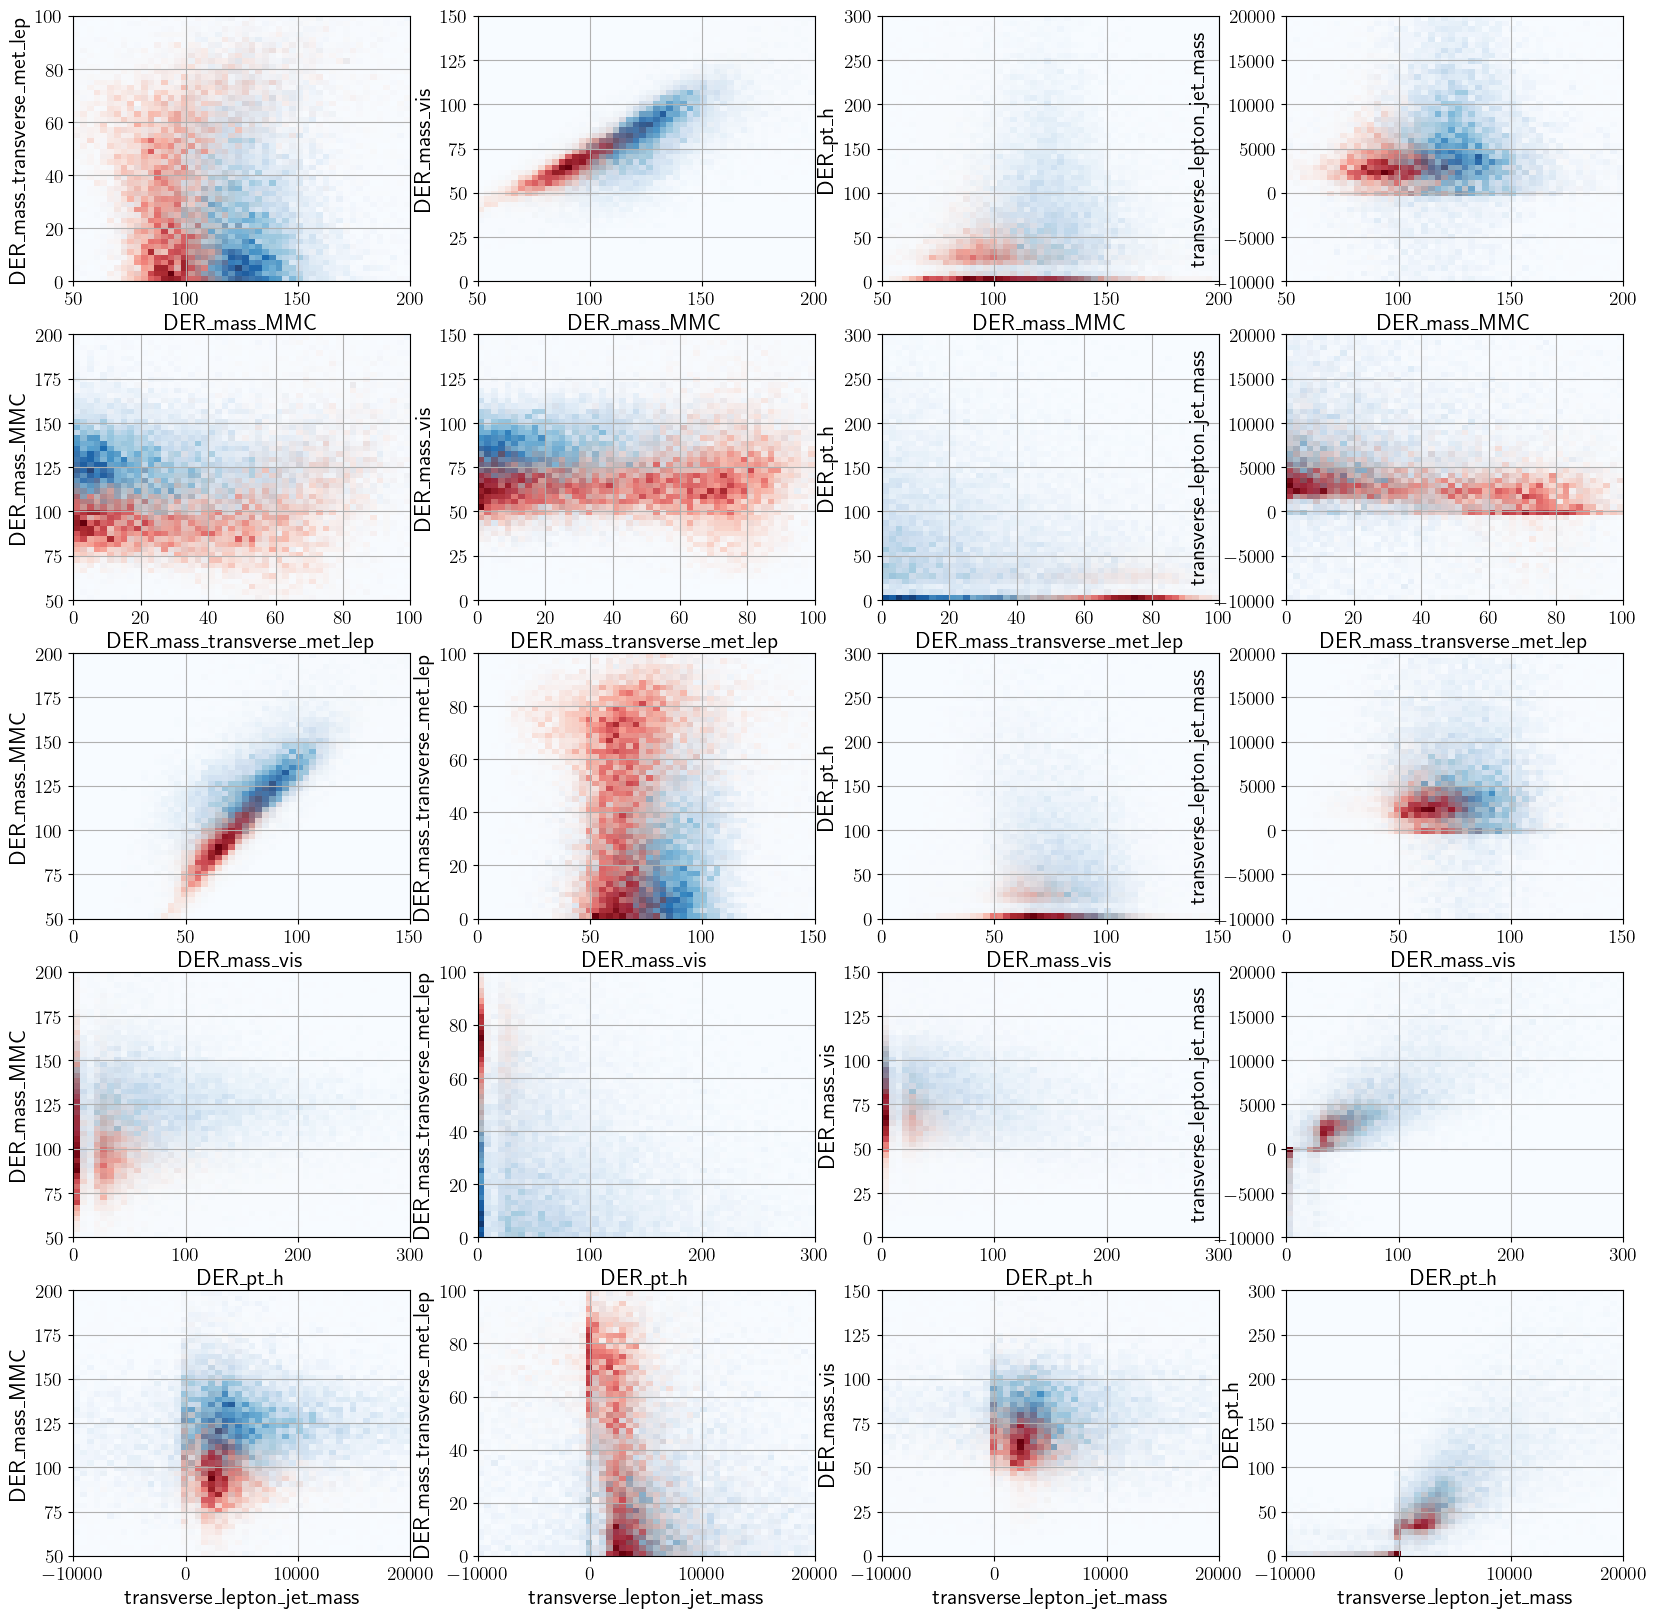

In [9]:
import itertools as it
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

# modify existing Reds colormap with a linearly fading alpha
red = pl.cm.Reds  # original colormap
fading_red = red(np.arange(red.N)) # extract colors
fading_red[:, -1] = np.linspace(0, 1, red.N) # modify alpha
fading_red = ListedColormap(fading_red) # convert to colormap



#column names
perms = it.permutations(input_columns, 2)

df_signal = pd.DataFrame(rdf_signal.AsNumpy())
df_bg = pd.DataFrame(rdf_bkg.AsNumpy())
#df_signal


fig, axs = plt.subplots(5,4, figsize=(20, 20))


for idx, (col_x, col_y) in enumerate(perms):
    ax = axs.flatten()[idx]
    
    signal_data_x = df_signal[col_x]
    signal_data_y = df_signal[col_y]
    rr = [region_dict[col_x], region_dict[col_y]]
    ax.hist2d(signal_data_x, signal_data_y, bins=50, range=rr, cmap='Blues', label='signal')
    bg_data_x = df_bg[col_x]
    bg_data_y = df_bg[col_y]
    ax.hist2d(bg_data_x, bg_data_y, bins=50, range=rr, cmap=fading_red, label='background')
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)

    #ax.set_title('RED: background; BLUE: signal')
    
    #plt.show()


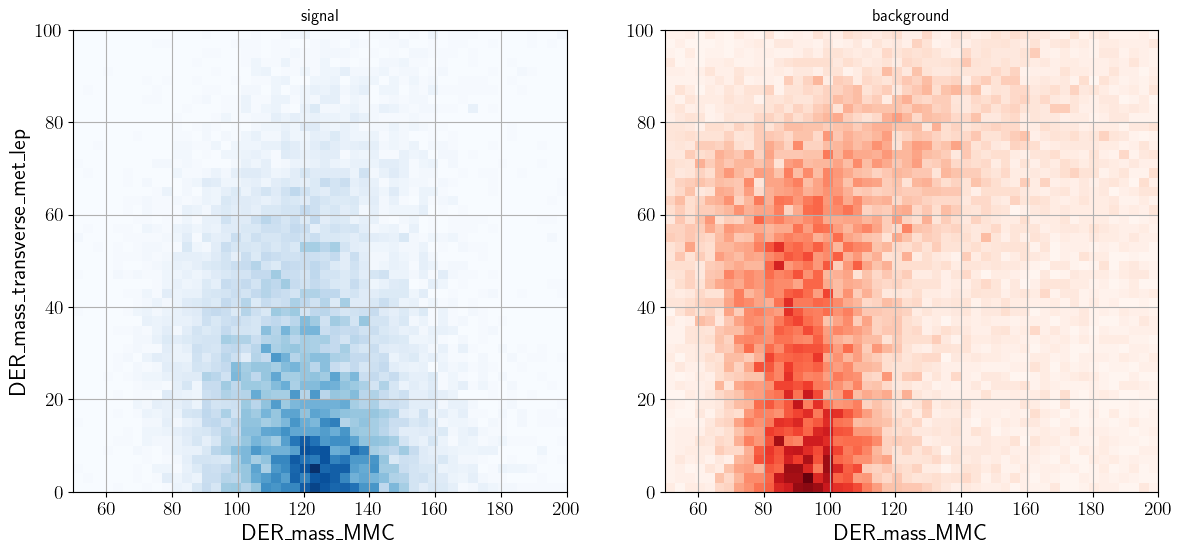

In [10]:
def sidebysidePlot(col_x, col_y):
    fig, (axl, axr) = plt.subplots(1,2, figsize=(14,6))

    rr = [region_dict[col_x], region_dict[col_y]]

    axl.hist2d(df_signal[col_x], df_signal[col_y], bins=50, range=rr, cmap='Blues')
    axl.set_xlabel(col_x)
    axl.set_ylabel(col_y)
    axl.set_title('signal')
    axl.grid(True)

    axr.hist2d(df_bg[col_x], df_bg[col_y], bins=50, range=rr, cmap='Reds')
    axr.set_xlabel(col_x)
    #axr.set_ylabel(col_y)
    axr.set_title('background')
    axr.grid(True)

sidebysidePlot(input_columns[0], input_columns[1])
    
    

## histograms

In [ ]:
def gaussian(x, A, mu, sigma):
    return A*np.exp(-0.5* (x-mu)**2 / sigma**2)



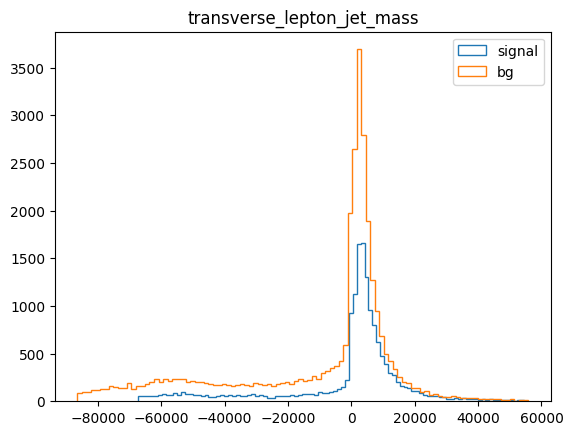

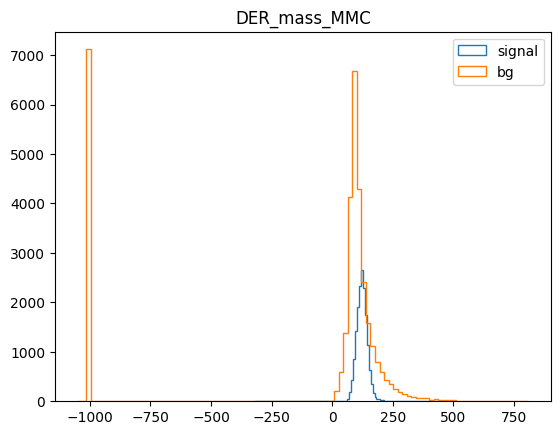

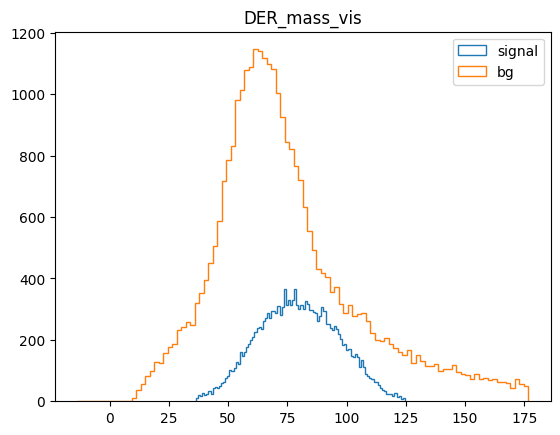

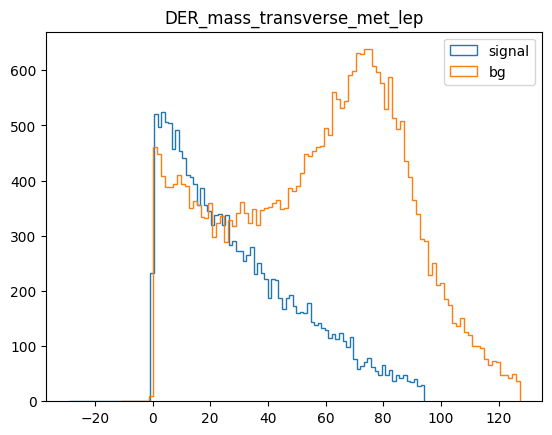

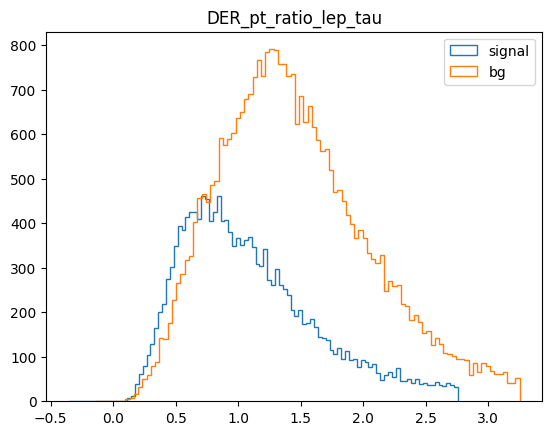

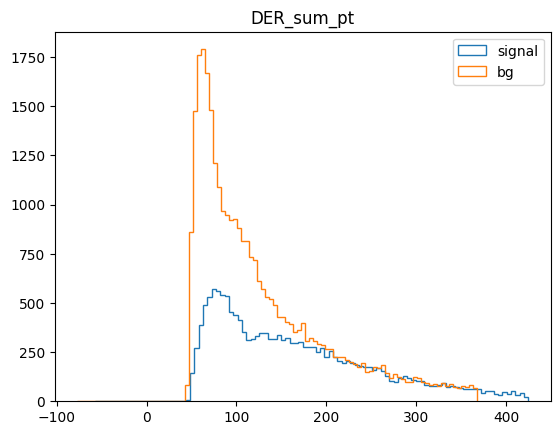

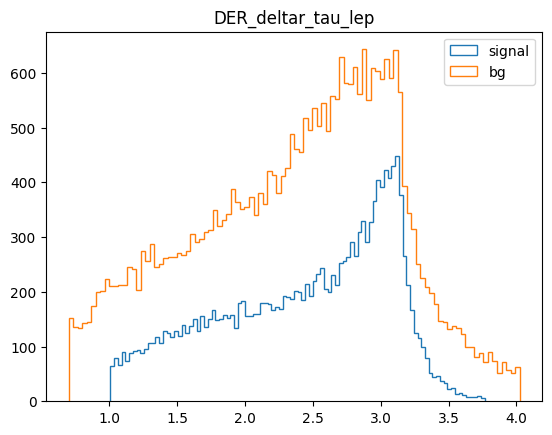

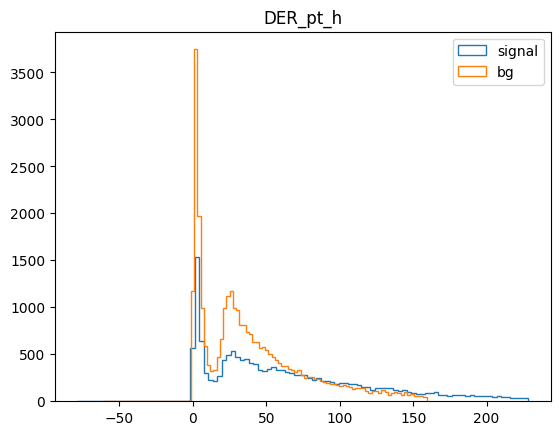

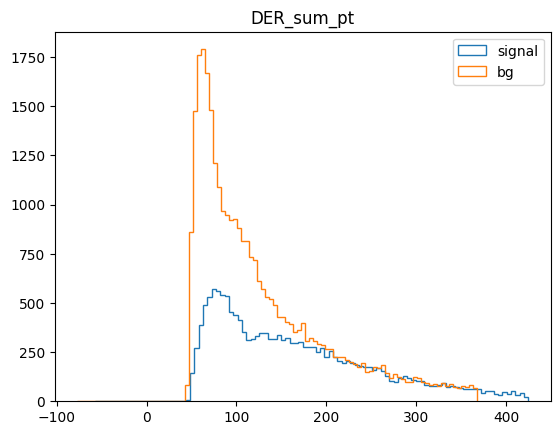

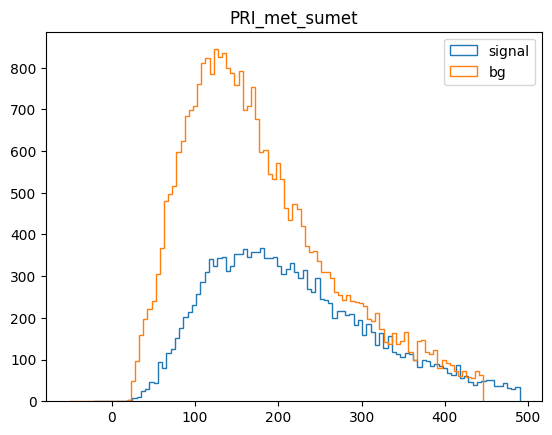

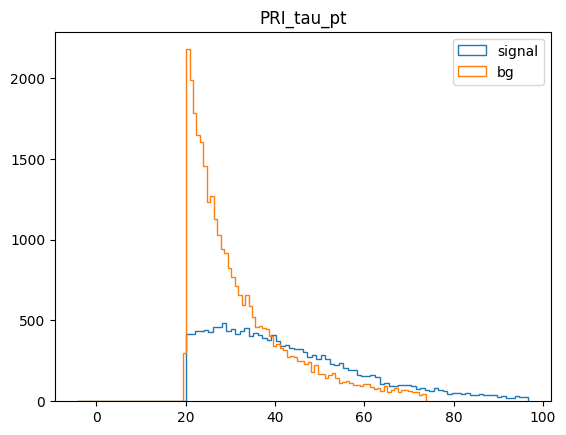

In [7]:
sel_columns = [ 'transverse_lepton_jet_mass',
'DER_mass_MMC',
'DER_mass_vis',
'DER_mass_transverse_met_lep',
'DER_pt_ratio_lep_tau',
'DER_sum_pt',
'DER_deltar_tau_lep',
'DER_pt_h',
'DER_sum_pt',
'PRI_met_sumet',
'PRI_tau_pt',
]

for col in sel_columns:
    plt.hist(df_signal[col], bins=100, range=[df_signal[col].mean() - 2*df_signal[col].std(), df_signal[col].mean() + 2*df_signal[col].std()], label='signal', histtype='step')
    plt.hist(df_bg[col], bins=100, range=[df_bg[col].mean() - 2*df_bg[col].std(), df_bg[col].mean() + 2*df_bg[col].std()], label='bg', histtype='step')
    plt.title(col)
    plt.legend()
    plt.show()

In [19]:
import math
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2))

def poisson(x, k, lamb):
    return A* lamb**k * np.exp(-lamb) / math.factorial(k)

from scipy.optimize import curve_fit

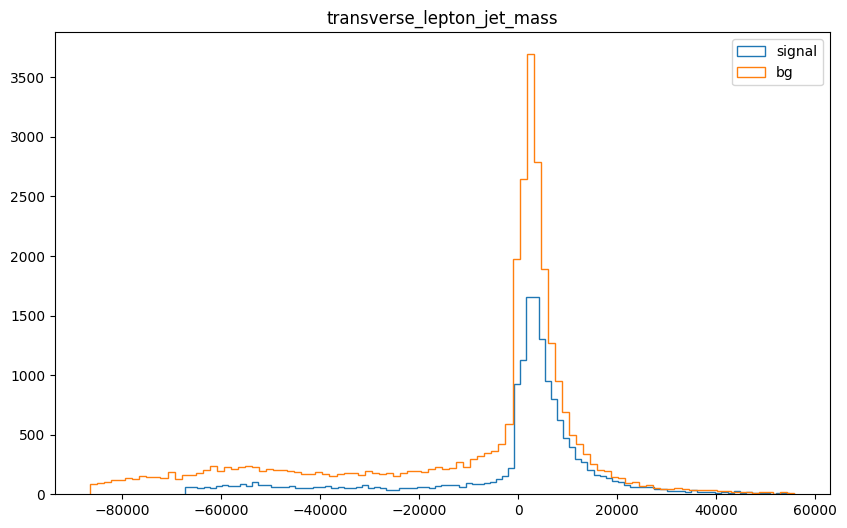

In [20]:
plt.figure(figsize=(10,6))
col = sel_columns[0]



counts, bins, _ = plt.hist(df_signal[col], bins=100, range=[df_signal[col].mean() - 2*df_signal[col].std(), df_signal[col].mean() + 2*df_signal[col].std()], label='signal', histtype='step')

fit_func = lambda x, A1, A2, m1, s1, m2, s2: gaussian(x, A1, m1, s1) + gaussian(x, A2, m1, s1)
#popt, pcov = curve_fit(fit_func, bins[:-1], counts)




plt.hist(df_bg[col], bins=100, range=[df_bg[col].mean() - 2*df_bg[col].std(), df_bg[col].mean() + 2*df_bg[col].std()], label='bg', histtype='step')



plt.title(col)
plt.legend()
plt.show()